<a href="https://colab.research.google.com/github/Reinaldos/Reinaldos/blob/main/Projeto_Modulo4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color = black> **Projeto Módulo 04 - Grupo 08**
###<font color = black>**Data Analytics - Turma 12 - Resilia**



# **<font color = green> Análise exploratória relacionada à série histórica de preço de venda da gasolina e do etanol**

###<font color = blue> **Fonte de Dados Utilizada** 

*   Portal Brasileiro de Dados Abertos - [Portal](https://dados.gov.br)
*   Base de Dados da Agência Nacional do Petróleo, Gás Natural e Biocombustíveis - ANP referente a série história de junho e julho de 2021 contendo a série histórica dos preços da gasolina e do etanol em todo o Brasil.

#<font color = green> **1. O que é ANP?**

A Agência Nacional do Petróleo, Biocombustíveis e Gás Natural criada em 1997 é responsável pelas regras e resoluções de exploração, produção, refino, comercialização e transporte do petróleo e seus derivados no Brasil. Além do petróleo, a ANP regula também as atividades das indústrias de gás natural e biocombustíveis. 

A agência é a responsável pela emissão de registros para postos de combustíveis e realiza semanalmente uma pesquisa nacional de preços dos combustíveis, com o objetivo de orientar os consumidores.

A ANP mantém o Banco de Dados de Exploração e Produção (BDEP), onde são publicados dados sobre a indústrias do petróleo, biocombustível e gás natural.

---

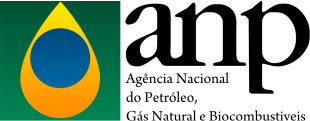





##<font color = blue>**1.1 Objetivo da análise**

Esta análise tem como objetivo observar a variação de preços de venda de combustíveis reltivos ao período de junho e julho de 2021 para compreender melhor se dados como localidade e tranporte podem interferir nos valores finais de venda dos produtos. Além de ajudar a elaborar meios para diminuição de custos de transporte.




#<font color = green>**2. Conhecendo os dados que serão analisados**
Nesta parte vamos conhecer melhor os bancos de dados que serão analisados utilizando fazendo a limpeza, organização dos datasets e explorarando os dados com as estatísticas descritivas.


##<font color = blue>**2.1 Série histórica**
Uma série histórica é uma seqüência de dados obtidos em intervalos regulares de tempo durante um período específico. 
Para essa análise exploratória, assim como solicitado pelo cliente, vamos utilizar as séries de junho e julho de 2021 do preço de venda de gasolina e etanol no Brasil.
Esses dados estão disponíveis no Portal Brasileiro de Dados Abertos - https://dados.gov.br/anp.

##<font color = blue>**2.2 Importando Base de Dados**
Carregando os pacotes do Python necessários à execução do projeto.


In [ ]:
# Bibliotecas Pandas e Numpy
import pandas as pd
import numpy as np

In [ ]:
# Importando bibliotecas de plotagem Seaborn e Matplotlib
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
matplotlib.rcParams['font.size'] = 18
sns.set_context('talk', font_scale=1.2);
%matplotlib inline

##<font color = blue>**Base de dados junho de 2021**


In [ ]:
# Carregando o dataset com informações: junho 2021.

junho_21 = pd.read_csv ('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-06-gasolina-etanol.csv', sep = ';')
junho_21.head()

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA,02/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA ADITIVADA,02/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,ETANOL,01/06/2021,"6,1",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,GASOLINA,01/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0004-94,AVENIDA LAURO MULLER,943,NaN,JOÃO ALVES,69980-000,GASOLINA,02/06/2021,"6,89",NaN,R$ / litro,BRANCA


##<font color = blue>**Base de dados julho de 2021**

In [ ]:
# Carregando o dataset com informações: julho 2021.

julho_21 = pd.read_csv ('https://www.gov.br/anp/pt-br/centrais-de-conteudo/dados-abertos/arquivos/shpc/dsan/2021/2021-07-gasolina-etanol.csv', sep = ';')
julho_21.head()

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,GASOLINA,01/07/2021,"5,499",NaN,R$ / litro,IPIRANGA
1,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,ETANOL,01/07/2021,"5,2",NaN,R$ / litro,IPIRANGA
2,NE,CE,MARACANAU,BEZERRA & MENDES COMERCIAL DE PETRÓLEO LTDA.,05.397.086/0001-51,RODOVIA MARANGUAPE - FORTALEZA - KM 06,S/N,NaN,PARQUE LUZARDO VIANA,61910-000,GASOLINA ADITIVADA,01/07/2021,"5,699",NaN,R$ / litro,IPIRANGA
3,NE,CE,MARACANAU,LUIZA GLAURIA R T MENEZES,03.602.329/0001-10,ESTRADA FORTALEZA MARANGUAPE,S/N,NaN,KAGADO,61901-410,GASOLINA,01/07/2021,"5,49",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,NE,CE,MARACANAU,LUIZA GLAURIA R T MENEZES,03.602.329/0001-10,ESTRADA FORTALEZA MARANGUAPE,S/N,NaN,KAGADO,61901-410,ETANOL,01/07/2021,"4,99",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.


In [ ]:
# Conhecendo o formato do dataset 1.

junho_21.shape

(49737, 16)

O dataset 1 apresenta um total de 49737 linhas, bem como um total de 16 colunas. 

In [ ]:
# Conhecendo o formato do dataset 2

julho_21.shape

(47849, 16)

O dataset 2 apresenta um total de 49849 linhas, bem como um total de 16 colunas, assim como o dataset 1. 

In [ ]:
# Cálculo do percentual de dados faltantes do Dataset 1

(junho_21.isnull().sum() / junho_21.shape[0]).sort_values(ascending=False)

Valor de Compra      1.000000
Complemento          0.797897
Bairro               0.002493
Número Rua           0.000462
Região - Sigla       0.000000
Estado - Sigla       0.000000
Município            0.000000
Revenda              0.000000
CNPJ da Revenda      0.000000
Nome da Rua          0.000000
Cep                  0.000000
Produto              0.000000
Data da Coleta       0.000000
Valor de Venda       0.000000
Unidade de Medida    0.000000
Bandeira             0.000000
dtype: float64

In [ ]:
# Cálculo do percentual de dados faltantes do Dataset 2

(julho_21.isnull().sum() / julho_21.shape[0]).sort_values(ascending=False)

Valor de Compra      1.000000
Complemento          0.798136
Bairro               0.002821
Número Rua           0.000711
Região - Sigla       0.000000
Estado - Sigla       0.000000
Município            0.000000
Revenda              0.000000
CNPJ da Revenda      0.000000
Nome da Rua          0.000000
Cep                  0.000000
Produto              0.000000
Data da Coleta       0.000000
Valor de Venda       0.000000
Unidade de Medida    0.000000
Bandeira             0.000000
dtype: float64

In [ ]:
# Conhecendo as varíaveis e seus tipos.

display(junho_21.dtypes)

Região - Sigla        object
Estado - Sigla        object
Município             object
Revenda               object
CNPJ da Revenda       object
Nome da Rua           object
Número Rua            object
Complemento           object
Bairro                object
Cep                   object
Produto               object
Data da Coleta        object
Valor de Venda        object
Valor de Compra      float64
Unidade de Medida     object
Bandeira              object
dtype: object

#**<font color = green> 3. Análise Exploratória e limpeza/correção de dados**


## Concatenando as tabelas para organizar o dataframe

In [ ]:
#utilizamos concat para unir as duas tabelas

tabela_completa = pd.concat([junho_21, julho_21])
tabela_completa.head()

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA,02/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA ADITIVADA,02/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,ETANOL,01/06/2021,"6,1",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,GASOLINA,01/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0004-94,AVENIDA LAURO MULLER,943,NaN,JOÃO ALVES,69980-000,GASOLINA,02/06/2021,"6,89",NaN,R$ / litro,BRANCA


In [ ]:
#correção do valor dos indices
tabela_completa.index=range(97586)

In [ ]:
# Criando uma cópia do dataset concatenado

dados = tabela_completa.copy()
dados.head()

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Nome da Rua,Número Rua,Complemento,Bairro,Cep,Produto,Data da Coleta,Valor de Venda,Valor de Compra,Unidade de Medida,Bandeira
0,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA,02/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,AVENIDA BOULEVARD THAUMATURGO,1031,NaN,CENTRO,69980-000,GASOLINA ADITIVADA,02/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,ETANOL,01/06/2021,"6,1",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,AVENIDA 25 DE AGOSTO,1350,NaN,25 DE AGOSTO,69980-000,GASOLINA,01/06/2021,"6,89",NaN,R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0004-94,AVENIDA LAURO MULLER,943,NaN,JOÃO ALVES,69980-000,GASOLINA,02/06/2021,"6,89",NaN,R$ / litro,BRANCA


In [ ]:
# Cálculo do percentual de dados faltantes do Dataset.

(tabela_completa.isnull().sum() / tabela_completa.shape[0]).sort_values(ascending=False)

Valor de Compra      1.000000
Complemento          0.798014
Bairro               0.002654
Número Rua           0.000584
Região - Sigla       0.000000
Estado - Sigla       0.000000
Município            0.000000
Revenda              0.000000
CNPJ da Revenda      0.000000
Nome da Rua          0.000000
Cep                  0.000000
Produto              0.000000
Data da Coleta       0.000000
Valor de Venda       0.000000
Unidade de Medida    0.000000
Bandeira             0.000000
dtype: float64

In [ ]:
# Retirando colunas que aparecem sem valores ou que não serão considerados para a análise neste primeiro momento

dados.drop(['Nome da Rua','Número Rua','Complemento','Bairro','Cep','Valor de Compra'],axis='columns', inplace = True)
dados

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
0,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,GASOLINA,02/06/2021,"6,89",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
1,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0005-75,GASOLINA ADITIVADA,02/06/2021,"6,89",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
2,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,ETANOL,01/06/2021,"6,1",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
3,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0006-56,GASOLINA,01/06/2021,"6,89",R$ / litro,PETROBRAS DISTRIBUIDORA S.A.
4,N,AC,CRUZEIRO DO SUL,CARDINAL E OLIVEIRA LTDA,03.608.766/0004-94,GASOLINA,02/06/2021,"6,89",R$ / litro,BRANCA
...,...,...,...,...,...,...,...,...,...,...
97581,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,GASOLINA ADITIVADA,26/07/2021,"5,87",R$ / litro,BRANCA
97582,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,ETANOL,26/07/2021,"4,99",R$ / litro,BRANCA
97583,SE,ES,ARACRUZ,POSTO DE COMBUSTIVEL SHOW EIRELI,23.797.660/0001-40,GASOLINA,26/07/2021,"5,87",R$ / litro,BRANCA
97584,SE,MG,ARAXA,AUTO POSTO BRANQUINHO LTDA,37.461.683/0001-94,ETANOL,28/07/2021,"4,599",R$ / litro,RIO BRANCO


In [ ]:
# Conhecendo o formato da cópia do dataset concatenado

dados.shape # retorna uma tupla ( numero de linhas, numero de variaveis)


(97586, 10)

Após concatenar os datasets ficamos com 1 único que contém 97586 linhas e com um total de 10 colunas já que foram retiradas as que não seriam consideradas para análise.

In [ ]:
dados.describe() #para ver um descrição mais detalhada 

,Região - Sigla,Estado - Sigla,Município,Revenda,CNPJ da Revenda,Produto,Data da Coleta,Valor de Venda,Unidade de Medida,Bandeira
count,97586,97586,97586,97586,97586,97586,97586,97586,97586,97586
unique,5,27,378,8450,9643,3,51,1628,1,50
top,SE,SP,SAO PAULO,SIM REDE DE POSTOS LTDA,04.597.735/0001-03,GASOLINA,05/07/2021,"5,599",R$ / litro,BRANCA
freq,50220,34677,3891,426,27,36953,3489,3256,97586,35927


In [ ]:
# Conhecendo as varíaveis e seus tipos.

display(dados.dtypes)

Região - Sigla       object
Estado - Sigla       object
Município            object
Revenda              object
CNPJ da Revenda      object
Produto              object
Data da Coleta       object
Valor de Venda       object
Unidade de Medida    object
Bandeira             object
dtype: object

In [ ]:
# Tipo de estrutura de dados
type(dados)

pandas.core.frame.DataFrame

In [ ]:
 #para obter mais informações do seu dataframe
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97586 entries, 0 to 97585
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Região - Sigla     97586 non-null  object
 1   Estado - Sigla     97586 non-null  object
 2   Município          97586 non-null  object
 3   Revenda            97586 non-null  object
 4   CNPJ da Revenda    97586 non-null  object
 5   Produto            97586 non-null  object
 6   Data da Coleta     97586 non-null  object
 7   Valor de Venda     97586 non-null  object
 8   Unidade de Medida  97586 non-null  object
 9   Bandeira           97586 non-null  object
dtypes: object(10)
memory usage: 7.4+ MB


In [ ]:
# convertendo data da coleta para padrão datetime

dados ['Data da Coleta'] = pd.to_datetime(dados['Data da Coleta'])
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97586 entries, 0 to 97585
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   Região - Sigla     97586 non-null  object        
 1   Estado - Sigla     97586 non-null  object        
 2   Município          97586 non-null  object        
 3   Revenda            97586 non-null  object        
 4   CNPJ da Revenda    97586 non-null  object        
 5   Produto            97586 non-null  object        
 6   Data da Coleta     97586 non-null  datetime64[ns]
 7   Valor de Venda     97586 non-null  object        
 8   Unidade de Medida  97586 non-null  object        
 9   Bandeira           97586 non-null  object        
dtypes: datetime64[ns](1), object(9)
memory usage: 7.4+ MB


In [ ]:
#Transformando os dados da coluna "Valor de Venda" em float
julho_21['Valor de Venda'] = julho_21['Valor de Venda'].apply(lambda x:str(x).replace(",","."))
julho_21['Valor de Venda'] = julho_21['Valor de Venda'].astype('float64')
junho_21['Valor de Venda'] = julho_21['Valor de Venda'].apply(lambda x:str(x).replace(",","."))
junho_21['Valor de Venda'] = julho_21['Valor de Venda'].astype('float64')
dados['Valor de Venda'] = dados['Valor de Venda'].apply(lambda x:str(x).replace(",","."))
dados['Valor de Venda'] = dados['Valor de Venda'].astype('float64')


## Criando tabelas pra cada um dos produtos

In [ ]:
aux= (dados['Produto'] == 'GASOLINA').copy()
gasolina = dados[aux]
aux1= (dados['Produto'] == 'GASOLINA ADITIVADA').copy()
gasolina_ad = dados[aux1]
aux2= (dados['Produto'] == 'ETANOL').copy()
etanol = dados[aux2]

#**<font color = green> 4. Análise dos dados a partir das questões solicitadas**



##**<font color = blue> Análise I**
### Como se comportaram o preço dos combustíveis durante os dois meses citados? Os valores do etanol e da gasolina tiveram uma tendência de queda ou diminuição?

#### Preços da **GASOLINA**

In [ ]:
# Variação dos valores da GASOLINA mês de junho de 2021

aux= (junho_21['Produto'] == 'GASOLINA').copy()
gasolina_junho = junho_21[aux]
valores_junho_gasolina = gasolina_junho.groupby('Data da Coleta').agg({'Valor de Venda': ['mean', 'min', 'max']}).copy()
valores_junho_gasolina

Valor de Venda              
                         mean    min    max
Data da Coleta                             
01/06/2021           5.466920  3.750  7.069
02/06/2021           5.339789  3.699  6.999
03/06/2021           5.489186  3.659  6.899
04/06/2021           5.457980  3.879  6.639
06/06/2021           5.392346  3.699  7.077
07/06/2021           5.365377  3.539  6.969
08/06/2021           5.382772  3.699  7.097
09/06/2021           5.388155  3.299  7.077
10/06/2021           5.355429  3.758  6.799
11/06/2021           5.199152  3.890  6.399
13/06/2021           5.522323  3.687  6.699
14/06/2021           5.399972  3.759  7.097
15/06/2021           5.497256  3.689  7.097
16/06/2021           5.435545  3.658  6.999
17/06/2021           5.437748  3.799  6.978
18/06/2021           5.286500  4.099  5.999
20/06/2021           5.459014  3.849  6.999
21/06/2021           5.431106  3.868  6.980
22/06/2021           5.498764  3.658  6.999
23/06/2021           5.521489  3.699  6.999
24/06/2021           5.582609  3.679  6.999
25/06/2021           5.643143  4.197  6.599
27/06/2021           5.321156  3.779  6.999
28/06/2021           5.415956  3.679  6.960
29/06/2021           5.451285  3.699  6.999
30/06/2021           5.419321  3.849  7.096

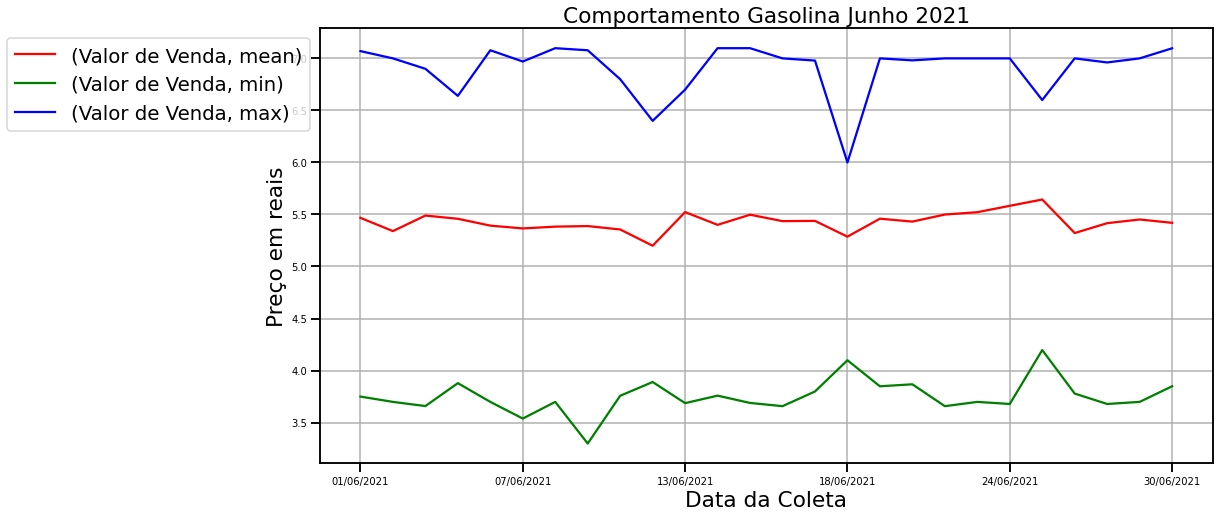

In [ ]:
grafico_junho_gasolina = valores_junho_gasolina.plot.line(ylabel = 'Preço em reais',title='Comportamento Gasolina Junho 2021', color='r''g''b',figsize =(16,8),fontsize = 10).grid()
plt.legend(loc = 'upper right', bbox_to_anchor = (0,1))

In [ ]:
# Variação dos valores da GASOLINA mês de julho de 2021

aux= (julho_21['Produto'] == 'GASOLINA').copy()
gasolina_julho = julho_21[aux]
valores_julho1 = gasolina_julho.groupby('Data da Coleta').agg({'Valor de Venda': ['mean', 'min', 'max']}).copy()
valores_julho1

Valor de Venda              
                         mean    min    max
Data da Coleta                             
01/07/2021           5.720424  4.959  6.799
04/07/2021           5.722119  4.899  6.749
05/07/2021           5.675800  4.870  6.960
06/07/2021           5.713260  4.549  6.890
07/07/2021           5.768251  4.859  6.969
08/07/2021           5.841474  5.179  6.799
09/07/2021           6.098613  5.699  6.429
11/07/2021           5.849151  5.099  6.799
12/07/2021           5.775490  4.859  6.969
13/07/2021           5.831829  4.799  6.899
14/07/2021           5.824783  4.959  6.990
15/07/2021           5.844501  4.999  6.975
16/07/2021           5.846268  5.255  6.540
18/07/2021           5.862689  5.129  6.905
19/07/2021           5.825607  4.989  6.899
20/07/2021           5.848252  4.970  6.990
21/07/2021           5.784281  4.970  6.975
22/07/2021           5.884054  4.970  6.975
23/07/2021           5.885800  5.156  6.399
25/07/2021           5.799896  4.970  6.599
26/07/2021           5.795186  4.798  6.839
27/07/2021           5.850743  4.990  6.990
28/07/2021           5.832696  4.899  6.799
29/07/2021           5.856948  5.079  6.999
30/07/2021           5.695919  5.349  6.292

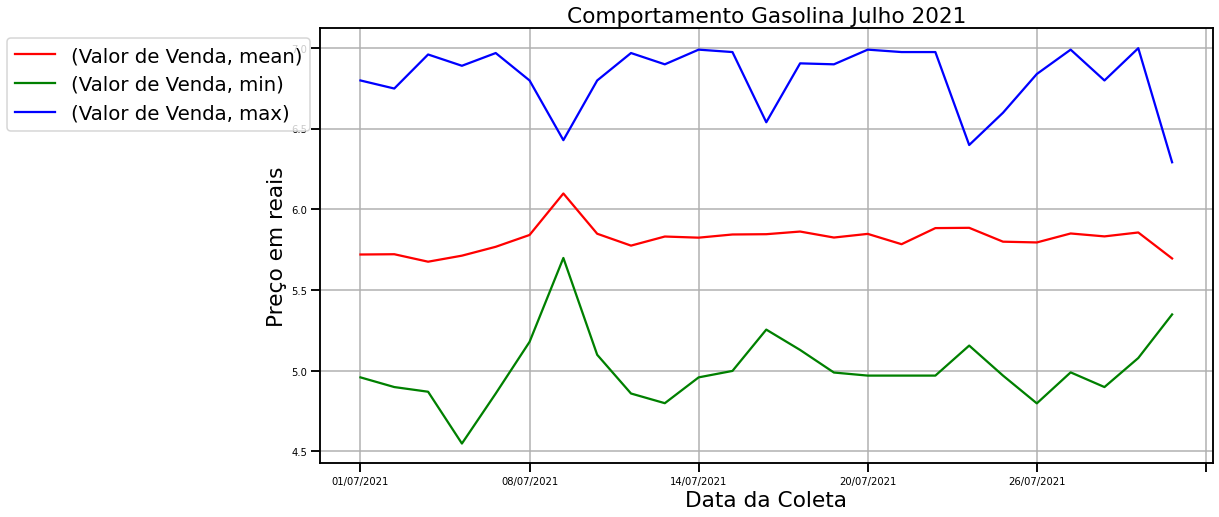

In [ ]:
grafico_julho_gasolina = valores_julho1.plot.line(ylabel = 'Preço em reais',title='Comportamento Gasolina Julho 2021', color='r''g''b',figsize =(16,8),fontsize = 10).grid()
plt.legend(loc = 'upper right', bbox_to_anchor = (0,1))

#### Preços da **GASOLINA ADITIVADA**

In [ ]:
# Variação dos valores da GASOLINA ADITIVADA mês de junho de 2021

aux= (junho_21['Produto'] == 'GASOLINA ADITIVADA').copy()
gasolina_ad_junho = junho_21[aux]
valores_junho_gasolina_aditiv = gasolina_ad_junho.groupby('Data da Coleta').agg({'Valor de Venda': ['mean', 'min', 'max']}).copy()
valores_junho_gasolina_aditiv

Valor de Venda              
                         mean    min    max
Data da Coleta                             
01/06/2021           5.477650  3.733  7.066
02/06/2021           5.442197  3.757  7.077
03/06/2021           5.488686  3.799  6.890
04/06/2021           5.432000  3.799  6.741
06/06/2021           5.398722  3.599  6.869
07/06/2021           5.368979  3.699  6.934
08/06/2021           5.416857  3.799  6.999
09/06/2021           5.366797  3.599  6.999
10/06/2021           5.329528  3.679  6.999
11/06/2021           5.451158  4.099  6.598
13/06/2021           5.404409  3.779  6.990
14/06/2021           5.481880  3.699  7.097
15/06/2021           5.468505  3.669  6.999
16/06/2021           5.456253  3.699  7.097
17/06/2021           5.407103  3.799  6.899
18/06/2021           6.329000  6.269  6.389
20/06/2021           5.510439  3.849  7.097
21/06/2021           5.421157  3.759  6.999
22/06/2021           5.481433  3.787  6.999
23/06/2021           5.476580  3.189  6.999
24/06/2021           5.464006  3.870  6.898
25/06/2021           6.065000  5.597  6.699
27/06/2021           5.434088  3.759  6.999
28/06/2021           5.429434  3.699  6.980
29/06/2021           5.435376  3.689  6.999
30/06/2021           5.393896  3.799  6.980

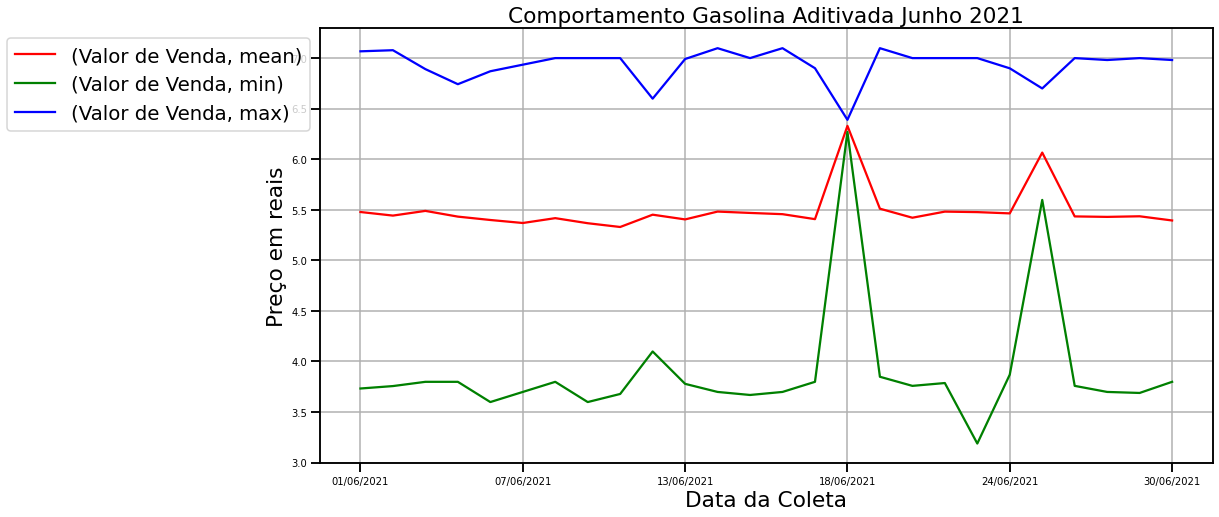

In [ ]:
grafico_junho_gasolina_aditiv = valores_junho_gasolina_aditiv.plot.line(ylabel = 'Preço em reais',title='Comportamento Gasolina Aditivada Junho 2021', color='r''g''b',figsize =(16,8),fontsize = 10).grid()
plt.legend(loc = 'upper right', bbox_to_anchor = (0,1))
grafico_junho_gasolina_aditiv

In [ ]:
# Variação dos valores da GASOLINA ADITIVADA mês de juLho de 2021

aux= (julho_21['Produto'] == 'GASOLINA ADITIVADA').copy()
gasolina_ad_julho = julho_21[aux]
valores_julho_gasolina_aditiv = gasolina_ad_julho.groupby('Data da Coleta').agg({'Valor de Venda': ['mean', 'min', 'max']}).copy()
valores_julho_gasolina_aditiv

Valor de Venda              
                         mean    min    max
Data da Coleta                             
01/07/2021           5.833324  4.899  6.999
04/07/2021           5.883320  5.099  6.896
05/07/2021           5.829935  4.999  6.999
06/07/2021           5.846378  5.149  6.999
07/07/2021           5.922523  4.859  7.077
08/07/2021           5.937177  5.259  6.899
09/07/2021           6.250789  5.899  6.620
11/07/2021           5.998106  5.189  6.999
12/07/2021           5.922044  4.859  7.066
13/07/2021           5.990151  4.999  6.999
14/07/2021           5.972033  5.199  6.980
15/07/2021           5.970587  5.059  7.097
16/07/2021           5.993429  5.299  6.590
18/07/2021           6.010424  5.249  6.999
19/07/2021           5.963544  5.189  6.999
20/07/2021           5.973533  4.950  6.999
21/07/2021           5.932774  5.180  7.097
22/07/2021           6.012805  5.279  7.097
23/07/2021           6.181115  5.449  6.490
25/07/2021           5.992282  5.180  6.699
26/07/2021           5.917621  5.189  6.999
27/07/2021           5.990569  4.690  6.999
28/07/2021           5.983937  5.199  6.999
29/07/2021           6.015951  5.199  7.097
30/07/2021           5.798545  5.380  6.392

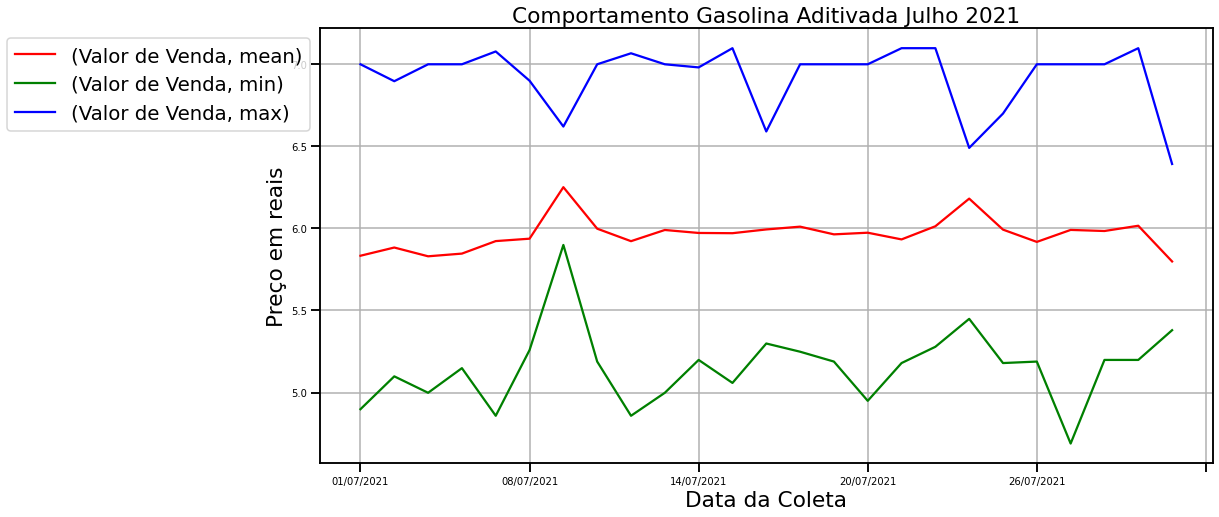

In [ ]:
grafico_julho_gasolina_aditiv = valores_julho_gasolina_aditiv.plot.line(ylabel = 'Preço em reais',title='Comportamento Gasolina Aditivada Julho 2021', color='r''g''b',figsize =(16,8),fontsize = 10).grid()
plt.legend(loc = 'upper right', bbox_to_anchor = (0,1))
grafico_julho_gasolina_aditiv

#### Preços do **ETANOL**

In [ ]:
# Variação dos valores da ETANOL mês de junho de 2021
aux= (junho_21['Produto'] == 'ETANOL').copy()
etanol_junho = junho_21[aux]
valores_junho3 = etanol_junho.groupby('Data da Coleta').agg({'Valor de Venda': ['mean', 'min', 'max']}).copy()
valores_junho3

Valor de Venda              
                         mean    min    max
Data da Coleta                             
01/06/2021           5.451700  3.769  6.999
02/06/2021           5.370426  3.697  6.869
03/06/2021           5.479089  3.849  6.899
04/06/2021           5.330171  3.869  6.499
06/06/2021           5.328842  3.799  6.916
07/06/2021           5.364155  3.559  6.880
08/06/2021           5.407502  3.659  7.069
09/06/2021           5.418165  3.557  7.097
10/06/2021           5.375736  3.779  6.999
11/06/2021           5.306387  3.919  6.350
13/06/2021           5.420641  3.679  6.990
14/06/2021           5.446816  3.739  6.999
15/06/2021           5.480849  3.659  6.999
16/06/2021           5.431085  3.679  6.999
17/06/2021           5.463992  3.798  6.999
18/06/2021           5.494250  3.999  6.389
20/06/2021           5.450870  3.859  6.999
21/06/2021           5.413415  3.699  6.980
22/06/2021           5.455326  3.689  6.990
23/06/2021           5.525794  3.819  6.970
24/06/2021           5.550193  3.839  7.096
25/06/2021           5.427667  4.289  6.390
27/06/2021           5.325586  3.649  6.699
28/06/2021           5.366843  3.799  6.999
29/06/2021           5.442707  3.749  6.999
30/06/2021           5.421058  3.829  7.097

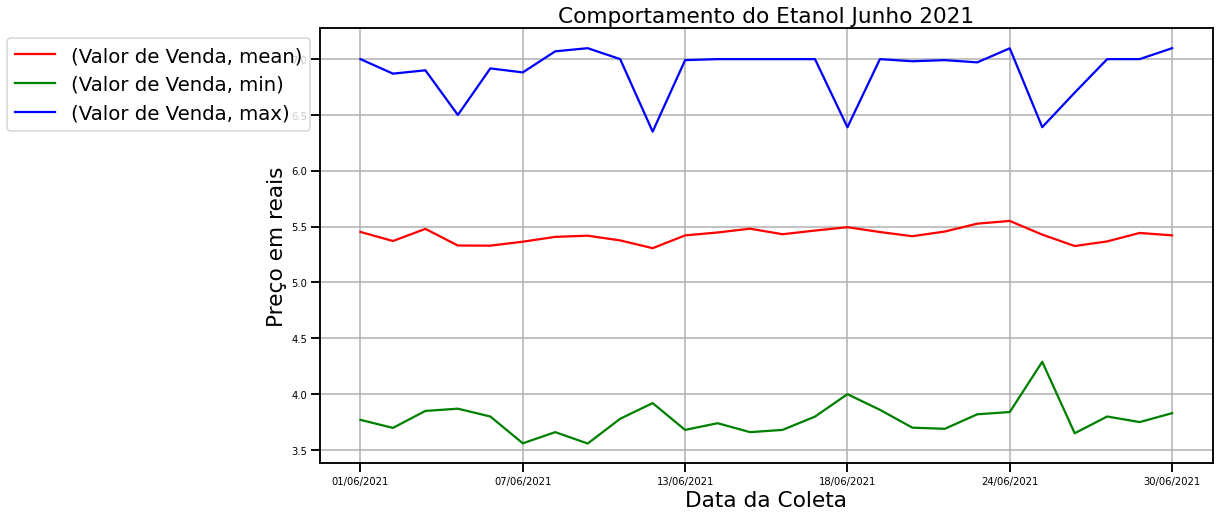

In [ ]:
grafico_junho_etanol = valores_junho3.plot.line(ylabel = 'Preço em reais',title='Comportamento do Etanol Junho 2021',color='r''g''b',figsize =(16,8), fontsize = 10).grid()
plt.legend(loc = 'upper right', bbox_to_anchor = (0,1))
grafico_junho_etanol

In [ ]:
# Variação dos valores da ETANOL mês de juLho de 2021
aux= (julho_21['Produto'] == 'ETANOL').copy()
etanol_julho = julho_21[aux]
valores_julho3 = etanol_junho.groupby('Data da Coleta').agg({'Valor de Venda': ['mean', 'min', 'max']}).copy()
valores_julho3

Valor de Venda              
                         mean    min    max
Data da Coleta                             
01/06/2021           5.451700  3.769  6.999
02/06/2021           5.370426  3.697  6.869
03/06/2021           5.479089  3.849  6.899
04/06/2021           5.330171  3.869  6.499
06/06/2021           5.328842  3.799  6.916
07/06/2021           5.364155  3.559  6.880
08/06/2021           5.407502  3.659  7.069
09/06/2021           5.418165  3.557  7.097
10/06/2021           5.375736  3.779  6.999
11/06/2021           5.306387  3.919  6.350
13/06/2021           5.420641  3.679  6.990
14/06/2021           5.446816  3.739  6.999
15/06/2021           5.480849  3.659  6.999
16/06/2021           5.431085  3.679  6.999
17/06/2021           5.463992  3.798  6.999
18/06/2021           5.494250  3.999  6.389
20/06/2021           5.450870  3.859  6.999
21/06/2021           5.413415  3.699  6.980
22/06/2021           5.455326  3.689  6.990
23/06/2021           5.525794  3.819  6.970
24/06/2021           5.550193  3.839  7.096
25/06/2021           5.427667  4.289  6.390
27/06/2021           5.325586  3.649  6.699
28/06/2021           5.366843  3.799  6.999
29/06/2021           5.442707  3.749  6.999
30/06/2021           5.421058  3.829  7.097

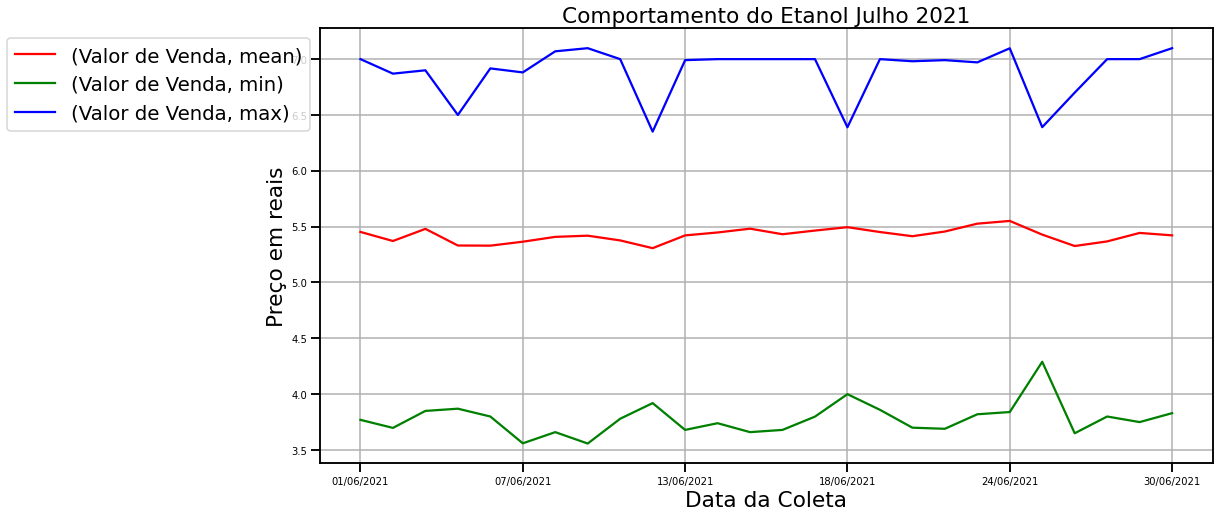

In [ ]:
grafico_julho_etanol = valores_julho3.plot.line(ylabel = 'Preço em reais',title='Comportamento do Etanol Julho 2021',color='r''g''b',figsize =(16,8), fontsize = 10).grid()
plt.legend(loc = 'upper right', bbox_to_anchor = (0,1))
grafico_julho_etanol

##**<font color = blue>Análise II (Carla/Reinaldo)**
####Qual o preço médio da gasolina e do etanol nesses dois meses?

1. Criar um novo DataFrame apenas com as colunas 'Produto' e 'Valor de Venda'
2. Calcular a média do 'Valor de Venda' usando .mean() e agrupar os resultados por produto usando groupby()
3. Renomear a coluna 'Valor de Venda' usando rename() e reduzir o número de casas decimais da média usando .round()

In [ ]:
media_produtos_aux1 = dados[['Produto','Valor de Venda']] 
media_produtos_aux2 = media_produtos_aux1.groupby(['Produto']).mean() 
media_produtos = media_produtos_aux2.rename(columns={'Valor de Venda':'Preço Médio'}).round(2)
media_produtos


,Preço Médio
Produto,
ETANOL,4.58
GASOLINA,5.73
GASOLINA ADITIVADA,5.88


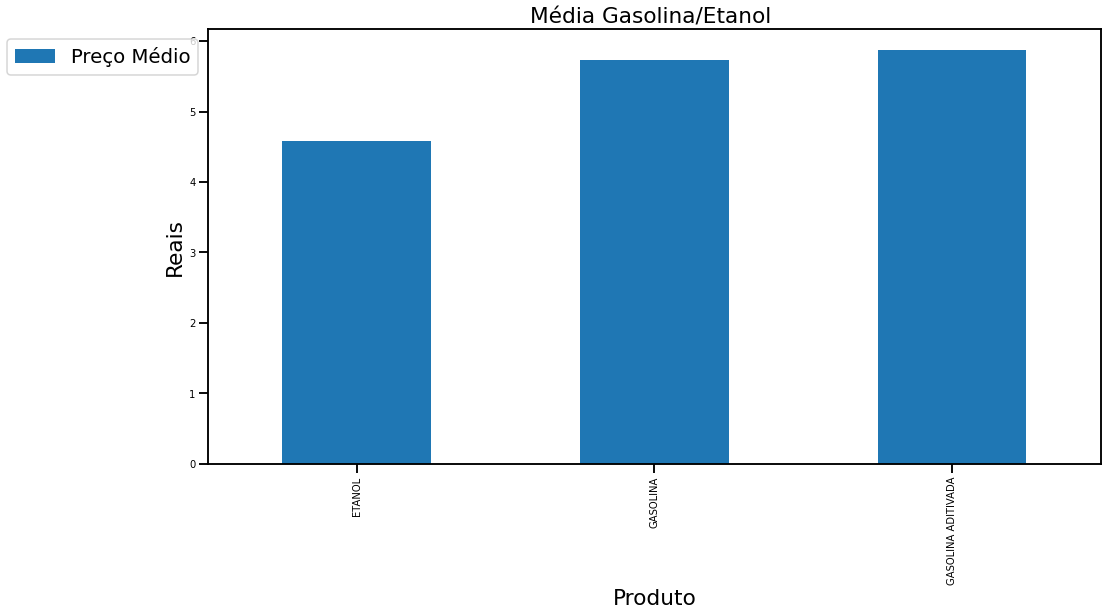

In [ ]:
grafico_média_gasolina_etanol = media_produtos.plot.bar(ylabel = 'Reais' , title='Média Gasolina/Etanol ',figsize =(16,8), fontsize = 10)
plt.legend(loc = 'upper right', bbox_to_anchor = (0,1))
grafico_julho_etanol

##**<font color = blue> Análise III**
#### Quais os 5 estados com o preço médio da gasolina e do etanol mais caros? 

In [ ]:
#gasolina_media_mais_cara = gasolina.groupby('Estado - Sigla').mean().sort_values('Valor de Venda', ascending=False).round(3)
#gasolina_media_mais_cara.iloc[[0]]

gasolina_media_mais_cara = gasolina.groupby('Estado - Sigla').mean().sort_values('Valor de Venda', ascending=False).round(3)
gasolina_media_mais_cara.head()

,Valor de Venda
Estado - Sigla,
AC,6.443
RJ,6.299
RN,6.155
PI,6.108
GO,6.040


In [ ]:

#gasolina_media_mais_cara = gasolina_ad.groupby('Estado - Sigla').mean().sort_values('Valor de Venda', ascending=False).round(3)
#gasolina_media_mais_cara.iloc[[0]]

gasolina_ad_media_mais_cara = gasolina_ad.groupby('Estado - Sigla').mean().sort_values('Valor de Venda', ascending=False).round(3)
gasolina_ad_media_mais_cara.head()

,Valor de Venda
Estado - Sigla,
AC,6.424
RJ,6.417
PI,6.309
RN,6.211
RS,6.146


In [ ]:
#etanol_media_mais_cara = etanol.groupby('Estado - Sigla').mean().sort_values('Valor de Venda', ascending=False).round(3)
#etanol_media_mais_cara.iloc[[0]]

etanol_media_mais_cara = etanol.groupby('Estado - Sigla').mean().sort_values('Valor de Venda', ascending=False).round(3)
etanol_media_mais_cara.head()

,Valor de Venda
Estado - Sigla,
RS,5.806
AC,5.535
RN,5.525
PA,5.333
AP,5.314


##**<font color = blue> Análise IV** 
#### Qual o preço médio da gasolina e do etanol por estado?


### Gasolina

In [ ]:
gasolina_media = gasolina.groupby('Estado - Sigla').mean().sort_values('Valor de Venda', ascending=False).round(3)
gasolina_media

,Valor de Venda
Estado - Sigla,
AC,6.443
RJ,6.299
RN,6.155
PI,6.108
GO,6.040
RS,6.024
MG,6.015
BA,5.961
AL,5.958


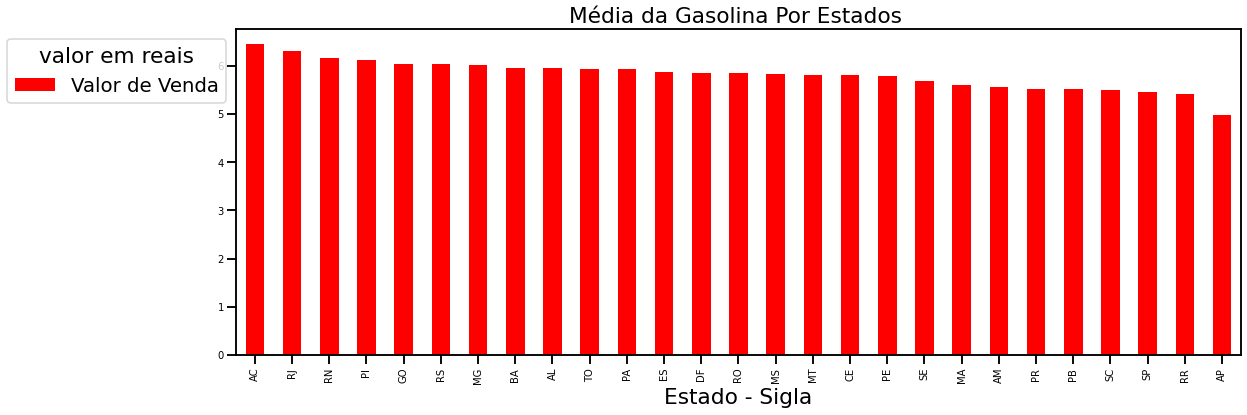

In [ ]:
grafico_preco_por_estado = gasolina_media.plot.bar(color = 'r',title='Média da Gasolina Por Estados ',figsize =(18,6), fontsize = 10)
plt.legend(title = 'valor em reais',loc = 'upper right', bbox_to_anchor = (0,1))
grafico_preco_por_estado

### Gasolina Aditivada

In [ ]:
gasolina_adv_media = gasolina_ad.groupby('Estado - Sigla').mean().sort_values('Valor de Venda', ascending=False).round(3)
gasolina_adv_media

,Valor de Venda
Estado - Sigla,
AC,6.424
RJ,6.417
PI,6.309
RN,6.211
RS,6.146
MG,6.145
GO,6.122
AL,6.073
PA,6.067


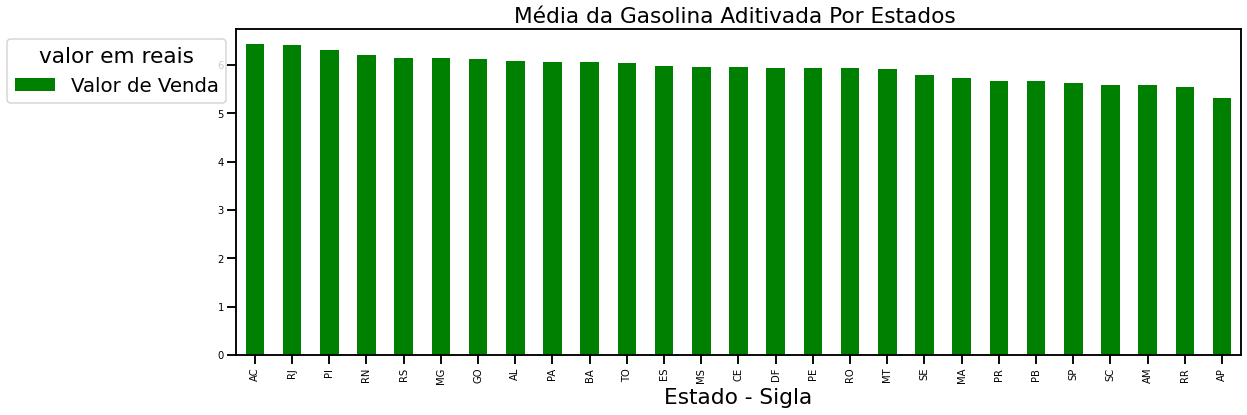

In [ ]:
grafico_preco_por_estado1 = gasolina_adv_media.plot.bar(color = 'g',title='Média da Gasolina Aditivada Por Estados ',figsize =(18,6), fontsize = 10)
plt.legend(title = 'valor em reais',loc = 'upper right', bbox_to_anchor = (0,1))
grafico_preco_por_estado1

### Etanol

In [ ]:
etanol_media = etanol.groupby('Estado - Sigla').mean().sort_values('Valor de Venda', ascending=False).round(3)
etanol_media

,Valor de Venda
Estado - Sigla,
RS,5.806
AC,5.535
RN,5.525
PA,5.333
AP,5.314
RJ,5.310
CE,5.204
AL,5.187
TO,5.133


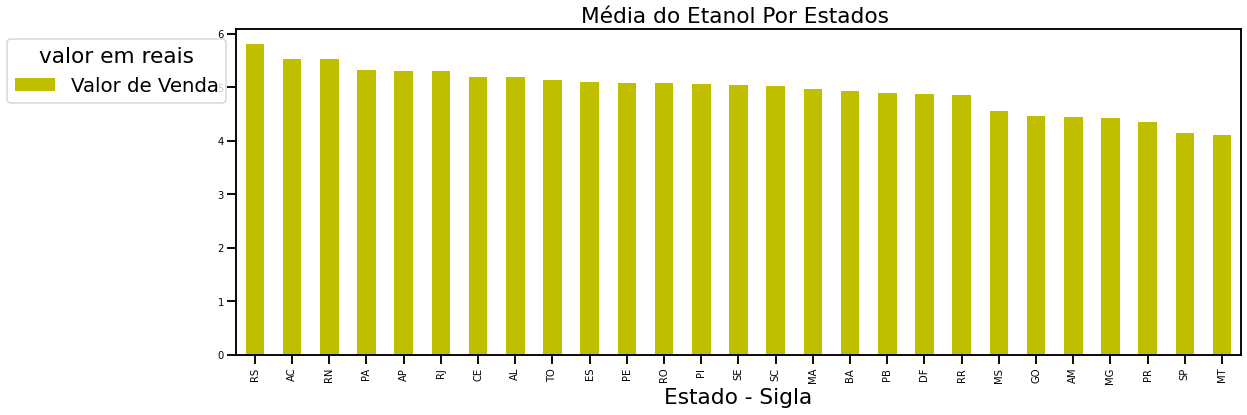

In [ ]:
grafico_preco_por_estado2 = etanol_media.plot.bar(color = 'y',title='Média do Etanol Por Estados ',figsize =(18,6), fontsize = 10)
plt.legend(title = 'valor em reais',loc = 'upper right', bbox_to_anchor = (0,1))
grafico_preco_por_estado2

##**<font color = blue> Análise V**
#### Qual o município que possui o menor preço para a gasolina e para o etanol?

In [ ]:
gasolina_menor = gasolina.groupby('Município').min().sort_values('Valor de Venda').round(3)
gasolina_menor.iloc[[0], [4,6]]

In [ ]:
gasolina_ad_menor = gasolina_ad.groupby('Município').min().sort_values('Valor de Venda').round(3)
gasolina_ad_menor.iloc[[0], [4,6]]

In [ ]:
etanol_mais_caro = etanol.groupby('Município').min().sort_values('Valor de Venda').round(3)
etanol_mais.iloc[[0], [4,6]]

##**<font color = blue> Análise VI**
####Qual o município que possui o maior preço para a gasolina e para o etanol? (Bruno)


In [ ]:
gasolina_mais_cara = gasolina.groupby('Município').max().sort_values('Valor de Venda', ascending=False)
gasolina_mais_cara.iloc[[0], [4,6]]

In [ ]:
gasolina_ad_mais_cara = gasolina_ad.groupby('Município').max().sort_values('Valor de Venda', ascending=False)
gasolina_ad_mais_cara.iloc[[0], [4,6]]

In [ ]:
etanol_mais_caro = etanol.groupby('Município').max().sort_values('Valor de Venda', ascending=False)
etanol_mais_caro.iloc[[0], [4,6]]

##**<font color = blue> Análise VII (Carla)**
#### Qual a região que possui o maior valor médio da gasolina?


1. Foi criado um novo Dataframe a partir da filtragem de dados do Dataframe original 
2. Foi criado um novo Dataframe apenas com as colunas 'Região-Sigla' e 'Valor de Venda' onde foi calculado a média de 'Valor de Venda' usando .mean() e o resultado foi agrupado por 'Regiaão-Sigla' e ordenado em ordem decrescente de valor .sort_values()
3. A coluna 'Valor de Venda' foi renomeada para 'Preço Médio GASOLINA' com renama() e o valor da média foi arrendondado para duas casas decimais . round(2)
4. Para exibir somente a Região com o maior preço médio da gasolina foi utilizado .head(1)

In [ ]:
gasolina_aux1= (dados['Produto'] == 'GASOLINA') | (dados['Produto'] == 'GASOLINA ADITIVADA')
gasolina = dados[gasolina_aux1]



In [ ]:
maior_vlr_medio_aux1 = gasolina[['Região - Sigla','Valor de Venda']].groupby('Região - Sigla').mean().sort_values('Valor de Venda', ascending=False)
maior_vlr_medio_regiao = maior_vlr_medio_aux1 .rename(columns={'Valor de Venda':'Preço Médio GASOLINA'}).round(2)
maior_vlr_medio_regiao.head(1)

##**<font color = blue>Análise VIII (Carla)**
####Qual a região que possui o menor valor médio do etanol?

1. Foi criado um novo Dataframe a partir da filtragem de dados do Dataframe original usando .contains()
2.Foi calculado a média de 'Valor de Venda' usando .mean() e o resultado agrupado por 'Região-Sigla' e 'Produto' e ordenado em ordem crescente de valor .sort_values() com o arredondamento para duas casas decimais . round()
3. A coluna 'Valor de Venda' foi renomeada para 'Preço Médio' com renama() 
4. Para exibir somente a Região com o menor preço médio do etanol foi utilizado .head(1)

In [ ]:
etanol_aux= dados[dados['Produto'].str.contains('ETANOL')].groupby(['Região - Sigla', 'Produto']).mean().sort_values('Valor de Venda', ascending=True).round(2)
menor_vlr_medio_etanol_regiao = etanol_aux.rename(columns={'Valor de Venda':'Preço Médio '}).head(1)
menor_vlr_medio_etanol_regiao

##**<font color = blue> Análise IX** 
##### Há alguma relação entre o valor do combustível (gasolina e etanol) e a região onde ele é vendido? (Carla)

In [ ]:
relacao_aux = dados[['Revenda','Região - Sigla']]
relacao_aux.drop_duplicates(['Revenda'], inplace=True)
qtd_revenda_regiao= relacao_aux.groupby(['Região - Sigla']).count().sort_values('Revenda', ascending=False)
qtd_revenda_regiao

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,Revenda
Região - Sigla,
SE,4497
NE,1475
S,1341
CO,696
N,441


In [ ]:
preco_regiao= dados.groupby(['Região - Sigla', 'Produto']).mean().round(2).rename(columns={'Valor de Venda':'Preço Médio'})
preco_regiao

Preço Médio
Região - Sigla Produto                        
CO             ETANOL                     4.41
               GASOLINA                   5.90
               GASOLINA ADITIVADA         5.99
N              ETANOL                     5.05
               GASOLINA                   5.82
               GASOLINA ADITIVADA         5.95
NE             ETANOL                     5.09
               GASOLINA                   5.86
               GASOLINA ADITIVADA         5.99
S              ETANOL                     4.82
               GASOLINA                   5.71
               GASOLINA ADITIVADA         5.85
SE             ETANOL                     4.35
               GASOLINA                   5.66
               GASOLINA ADITIVADA         5.83

In [ ]:
preco_regiao_para_grafico= dados.groupby(['Região - Sigla', 'Produto']).mean().round(2).rename(columns={'Valor de Venda':''})


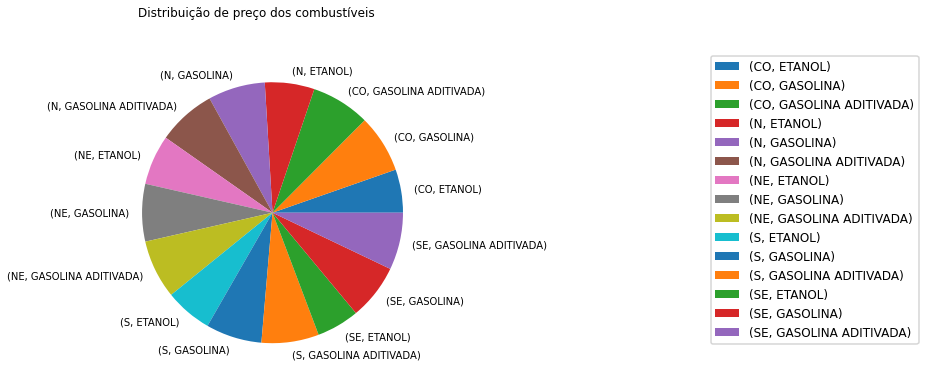

In [ ]:
grafico_comparação1 = preco_regiao_para_grafico.plot.pie(title = 'Distribuição de preço dos combustíveis',subplots=True,figsize =(18,6), fontsize = 10)
plt.legend(fontsize = 12,loc = 0, bbox_to_anchor = (2.5,1))
grafico_preco_por_estado2

Ao observar o preço médio dos diferetes produtos praticados em cada região, é possivel observar que o preço da gasolina normal e aditivada muda pouco conforme as diferentes regiões, com uma pequena exceção para o sudeste, em que os preços sao um pouco mais baratos. Já ao observarmos os preços médio do etanol, podemos visualizar uma grande diminuição dos valores nas regiões sudeste e centro-oeste, se comparado as demais, o que pode ser explicado pela fato dessas regiões se destacarem pela produção da cana-de-açucar, principalmente nos estados de São Paulo e Goiás, que lideram os rankings de produção

##**<font color = blue> Análise X**
#### Há alguma correlação entre o valor do combustível (gasolina e etanol) e a bandeira que vende ele?

In [ ]:
preco_bandeiras_gasolina= gasolina.groupby(['Bandeira',]).mean().round(2).rename(columns={'Valor de Venda':'Preço Médio'})
preco_bandeiras_gasolina.sort_values('Preço Médio', ascending=False)

,Preço Médio
Bandeira,
ACOL,6.16
PETROBAHIA,6.16
CHARRUA,6.06
MASUT DISTRIBUIDORA,6.06
WATT,6.06
RIO BRANCO,6.05
FAN,6.05
SUL COMBUSTÍVEIS,6.05
TOBRAS,6.00


In [ ]:
preco_bandeiras_gasolina1= preco_bandeiras_gasolina

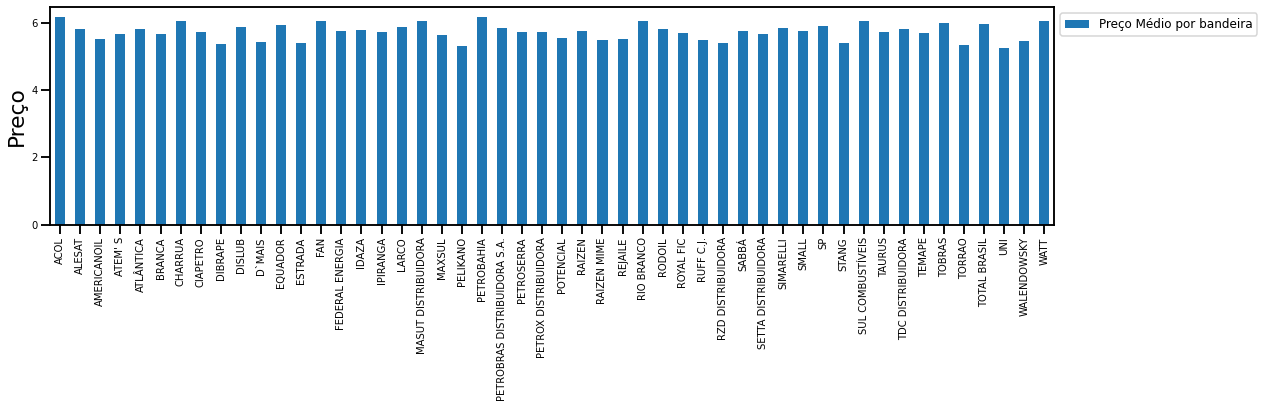

In [ ]:
grafico_comparação2 = preco_bandeiras_gasolina1.plot.bar(ylabel = 'Preço',xlabel = '',figsize =(18,4), fontsize = 10)
plt.legend(fontsize = 12,loc = 0, bbox_to_anchor = (1,1))
grafico_comparação2

In [ ]:
preco_bandeiras_gasolina.mean()

Preço Médio    5.7332
dtype: float64

In [ ]:
preco_bandeiras_gasolina.std()

Preço Médio    0.23834
dtype: float64

É perceptivel uma diferença de valores consideravel as entre médias de preço praticados pelas diferentes bandeiras, por exemplo, aos comprarmos 20 litros do combustivel vendido pela Pelikano estaremos gastando 106,00 reais, já se a decisão for de escolher o da Petrobahia, que pratica os valores mais elevados, gastaremos uma média de R$ 123,4, um acréscimo de aproximadamente 17,4 reais.

In [ ]:
preco_bandeiras_etanol= etanol.groupby(['Bandeira',]).mean().round(2).rename(columns={'Valor de Venda':'Preço Médio'})
preco_bandeiras_etanol.sort_values('Preço Médio', ascending=False)

,Preço Médio
Bandeira,
CHARRUA,5.87
SUL COMBUSTÍVEIS,5.50
SP,5.23
FAN,5.23
DISLUB,5.18
PETROBAHIA,5.09
TEMAPE,5.09
PETROX DISTRIBUIDORA,5.06
TDC DISTRIBUIDORA,5.05


In [ ]:
preco_bandeiras_etanol.mean()

Preço Médio    4.7194
dtype: float64

In [ ]:
preco_bandeiras_etanol.std()

Preço Médio    0.383248
dtype: float64

A diferença de preços do etanol praticados depende mais ainda das bandeiras do que em comparação ao que ocorre na gasolina, como podemos ver pelo desvio padrão maior, e pela comparação dos casos extremos, em que o preço mais alto é de 5.87, e o mais barato é de 4.09. Ao utilizarmos mesmo exemplo da compra de 20 litros, a diferença seria de R$ 35,6

#**<font color = orange> Análise Extra | Municípios com maior número de unidades**

Um total de 8841 postos de revenda diferentes estão representados na tabela, desse total, a cidade com o maior número de postos é São Paulo, possuindo 505, seguida pelo Rio de Janeiro, com 248, e Fortaleza, com 181.

In [ ]:
aux_mun_mais_postos = dados[["Município","Revenda"]].drop_duplicates().copy()
aux_mun_mais_postos.groupby('Município').count().sort_values('Revenda', ascending = False).round(3).head()



,Revenda
Município,
SAO PAULO,505
RIO DE JANEIRO,248
FORTALEZA,181
SALVADOR,149
RECIFE,110


#**<font color = orange> Análise Extra | Estados com menos unidades** 

In [ ]:
aux_est_menos_postos = dados[["Estado - Sigla","Revenda"]].drop_duplicates().copy()
aux_est_menos_postos.groupby('Estado - Sigla').count().sort_values('Revenda').round(3).head()

In [ ]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip -q

In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
report = ProfileReport(dados)

In [ ]:
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]